### K-Means Clustering
- Example of Hard Clustering - Each data point belongs to only one cluster
- It is a special case (example) of Expectation-Maximization algorithms (involves E-steps and M-steps)
- Common clustering technique, helps to solve problems efficiently
- eg. Given locations of customers who order pizza regularly, find optimal locations to open k pizza parlours

<br>

**Input:** X = {x1, x2, ..., xN}<br>
**Goal:** Partition the data among some K number of clusters. Let us assume K is known to us.

Let $\mu_k$ denote the center of $k^{th}$ cluster ($\mu_k$ will be a vector)

So we need to ﬁnd an assignment of data points to clusters, as well as a set of cluster centers {$\mu_k$}, such that the sum of the squares of the distances of each data point to its closest cluster center µk, is a minimum 

##### Algorithm:

1. Initialize k number of means randomly
2. Assign each data point to nearest cluster
3. Update center (mean) using all the data points in that cluster
4. Repeat steps 2 and 3 till convergence

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs

In [4]:
X, y = make_blobs(n_samples=500, centers=5, n_features=2)

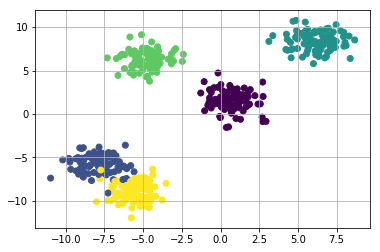

In [5]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.grid(True)
plt.show()

In [6]:
k = 5
colors = ['green', 'red', 'blue', 'yellow', 'orange']
clusters = {}

for i in range(k):
    center = 10*(2*np.random.random((X.shape[1])) - 1)
    points = []
    cluster = {'center' : center, 
               'points' : points, 
               'color' : colors[i]}
    clusters[i] = cluster

In [7]:
center = 10*(2*np.random.random((X.shape[1])) - 1)
print(center)

[-3.87043454 -6.07702582]


In [8]:
print(clusters)

{0: {'center': array([-3.55373366,  7.83599969]), 'points': [], 'color': 'green'}, 1: {'center': array([-4.01333211, -3.53076851]), 'points': [], 'color': 'red'}, 2: {'center': array([ 0.18612416, -9.62651087]), 'points': [], 'color': 'blue'}, 3: {'center': array([-0.34010666,  1.6315468 ]), 'points': [], 'color': 'yellow'}, 4: {'center': array([ 4.96838159, -6.37979443]), 'points': [], 'color': 'orange'}}


In [9]:
def distance(v1, v2):
    return np.sqrt(np.sum((v1-v2)**2))


# E-step
def assignPointsToClusters(clusters):
    
    for ix in range(X.shape[0]):
        dist = []
        curr_x = X[ix]

        for kx in range(k):
            cluster_center = clusters[kx]['center']
            d = distance(curr_x, cluster_center)
            dist.append(d)
            
        min_dist_index = np.argmin(dist)                       # Current cluster to which this point is nearest
        clusters[min_dist_index]['points'].append(curr_x)
        
        
# M-step
def updateClusters(clusters):
    
    for kx in range(k):
        pts = np.array(clusters[kx]['points'])
        
        if (pts.shape[0] > 0):                      # If cluster has some (non-zero) points 
            new_u = pts.mean(axis = 0)
            clusters[kx]['center'] = new_u          # Assign new center
            clusters[kx]['points'] = []             # Clear the list of points
            
            
def plotCluster(clusters):
    for i in range(k):
        
        # Plot points
        pts = np.array(clusters[i]['points'])
        try:
            plt.scatter(pts[:,0], pts[:,1], color=clusters[i]['color'])
        except:
            pass
        
        # Plot cluster centers
        u = clusters[i]['center']
        plt.scatter(u[0], u[1], marker='*', c='black')
        
        print(u)
    print()

In [10]:
# a = [1,2,3,4]
# a = np.array(a)
# print(np.mean(a))
# print(a.mean())

[-3.55373366  7.83599969]
[-4.01333211 -3.53076851]
[ 0.18612416 -9.62651087]
[-0.34010666  1.6315468 ]
[ 4.96838159 -6.37979443]

[-2.3029951   6.99039903]
[-7.14851093 -6.70669675]
[-5.1145596  -9.79419861]
[3.02970961 4.10566134]
[ 4.96838159 -6.37979443]

[-4.71249527  6.193131  ]
[-7.61672005 -6.02509743]
[-5.47877038 -9.1967105 ]
[3.46298171 4.95345664]
[ 4.96838159 -6.37979443]

[-4.72346222  6.17059447]
[-7.93543859 -5.68085989]
[-5.5855221  -8.90717241]
[3.49945168 5.03125494]
[ 0.44823948 -1.52141413]



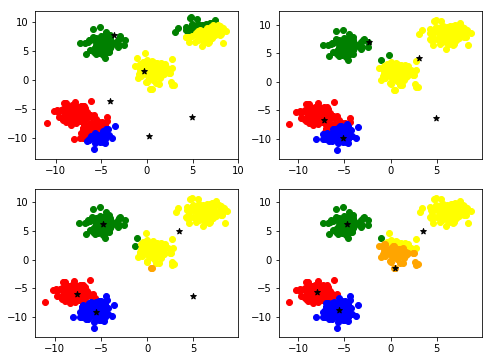

In [11]:
plt.figure(figsize=(8,6))
plt.subplot(221)
assignPointsToClusters(clusters)
plotCluster(clusters)
updateClusters(clusters)
plt.subplot(222)
assignPointsToClusters(clusters)
plotCluster(clusters)
updateClusters(clusters)
plt.subplot(223)
assignPointsToClusters(clusters)
plotCluster(clusters)
updateClusters(clusters)
plt.subplot(224)
assignPointsToClusters(clusters)
plotCluster(clusters)
updateClusters(clusters)

[-4.75757889  6.20778232]
[-7.99364586 -5.60954023]
[-5.62196444 -8.84904384]
[5.10766109 7.1589152 ]
[0.51164403 1.05993794]

[-4.79457781  6.23267882]
[-7.99364586 -5.60954023]
[-5.62196444 -8.84904384]
[6.18399595 8.36753591]
[0.66054048 1.52462303]

[-4.79457781  6.23267882]
[-7.99364586 -5.60954023]
[-5.62196444 -8.84904384]
[6.18399595 8.36753591]
[0.66054048 1.52462303]

[-4.79457781  6.23267882]
[-7.99364586 -5.60954023]
[-5.62196444 -8.84904384]
[6.18399595 8.36753591]
[0.66054048 1.52462303]



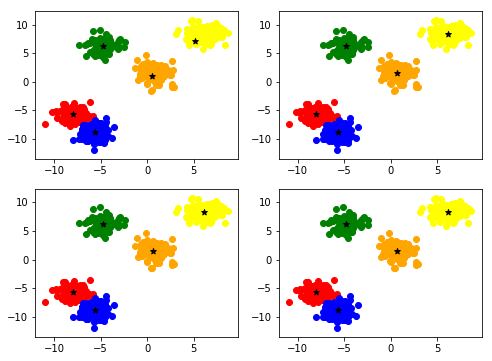

In [12]:
plt.figure(figsize=(8,6))
plt.subplot(221)
assignPointsToClusters(clusters)
plotCluster(clusters)
updateClusters(clusters)
plt.subplot(222)
assignPointsToClusters(clusters)
plotCluster(clusters)
updateClusters(clusters)
plt.subplot(223)
assignPointsToClusters(clusters)
plotCluster(clusters)
updateClusters(clusters)
plt.subplot(224)
assignPointsToClusters(clusters)
plotCluster(clusters)
updateClusters(clusters)

### KMeans++ & K-Means in SKLearn
- K-means is quite sensitive to initialization of cluster centers (initial means)
- If center initialization is not good, we may get less number of clusters than required
- To overcome this, KMeans++ algorithm is used to initialise the cluster centers
- KMeans++ chooses initial centers such that they are statistically close to final ones
- This method is the default choice for sklearn

Papers:
1. http://ilpubs.stanford.edu:8090/778/1/2006-13.pdf
2. https://arxiv.org/pdf/1202.1585.pdf

In [27]:
from sklearn.cluster import KMeans

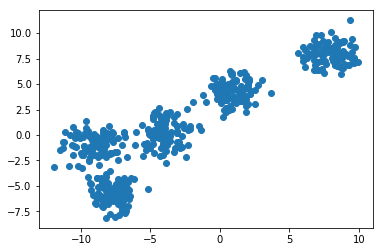

In [28]:
X, y = make_blobs(centers=5, n_features=2, n_samples=500, random_state=3)
plt.scatter(X[:,0], X[:,1])
plt.show()

In [45]:
kmeans = KMeans(n_clusters=5)

In [55]:
kmeans.fit(X, y)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [63]:
# Display centers of clusters algorithm learnt
centers = kmeans.cluster_centers_
print(centers)

[[-3.97953526  0.19458336]
 [ 7.8649674   7.97988109]
 [-9.0671623  -0.96740759]
 [ 0.88641907  4.19441853]
 [-7.6726196  -5.69211059]]


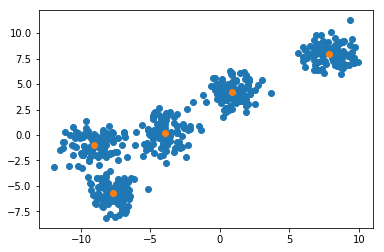

In [64]:
plt.scatter(X[:,0], X[:,1])
plt.scatter(centers[:,0], centers[:,1])
plt.show()

In [65]:
# To display the predicted label for each data point in dataset
y_pred = kmeans.labels_
print(y_pred)

[4 1 0 4 4 0 2 4 1 4 1 0 1 4 0 4 1 4 4 1 3 3 4 0 4 3 2 2 0 2 4 2 3 3 4 3 1
 1 4 3 3 3 2 2 0 1 1 2 2 2 1 4 2 4 4 3 4 4 1 0 1 0 0 4 2 1 0 0 3 0 3 4 3 4
 3 0 4 2 3 3 0 3 0 2 1 2 0 1 2 0 2 3 4 3 3 1 4 0 0 3 1 3 0 0 1 1 1 0 0 4 1
 2 4 1 0 3 1 2 3 0 1 0 2 4 3 2 2 2 4 4 0 0 4 1 1 2 0 2 0 4 4 3 0 1 2 4 1 1
 4 0 4 4 0 0 1 3 3 2 0 4 3 1 2 3 1 3 1 3 3 3 2 4 3 1 3 2 4 0 1 2 1 4 1 3 2
 2 3 4 0 1 3 0 2 4 2 3 0 2 4 4 4 3 3 1 4 2 2 4 1 4 4 4 3 1 0 1 4 4 1 2 0 2
 2 3 4 0 4 0 2 3 0 0 4 3 4 3 0 1 0 3 3 1 4 4 0 0 3 1 3 4 2 1 2 4 2 2 2 2 1
 3 1 4 3 1 2 0 1 1 1 2 4 4 0 3 3 1 0 0 4 0 2 0 1 1 2 2 3 2 2 1 3 4 0 3 0 2
 0 0 1 4 3 1 3 3 4 2 3 0 3 2 4 4 0 1 3 2 1 3 0 2 1 2 4 3 2 0 0 3 3 3 4 2 3
 4 1 0 0 2 1 1 0 0 2 3 3 3 4 2 1 2 4 3 1 1 0 3 3 2 3 2 0 0 0 2 3 4 3 0 2 2
 1 4 1 2 4 2 0 1 3 1 0 4 4 1 1 3 1 3 2 0 1 2 4 4 1 0 3 2 4 4 4 2 1 3 1 1 1
 2 3 0 1 0 0 2 0 4 0 4 1 3 3 4 1 2 4 3 0 1 2 0 2 2 1 2 0 2 1 2 0 2 4 3 3 2
 3 1 3 3 2 4 4 0 2 3 0 2 0 1 0 1 4 3 0 4 0 4 4 3 4 3 2 1 1 0 4 4 2 2 1 2 2
 1 2 1 1 1 2 3 2 0 1 0 0 

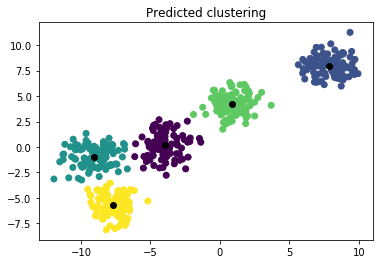

In [66]:
plt.scatter(X[:,0], X[:,1], c=y_pred)
plt.title("Predicted clustering")
plt.scatter(centers[:,0], centers[:,1], color='black')
plt.show()

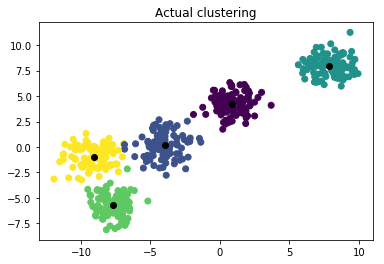

In [67]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.title("Actual clustering")
plt.scatter(centers[:,0], centers[:,1], color='black')
plt.show()